In [12]:
from libsvm.svmutil import svm_read_problem
import numpy as np

N = 200
d = 47205

labels, features = svm_read_problem('rcv1_train_h200.binary')

labels = labels[:N]
features = features[:N]

# Convert to array and matrix
labels_arr = np.array(labels)

features_arr = np.empty(N, dtype=np.ndarray)
for i, feature in enumerate(features):
    feature[0] = 1

    features_arr[i] = np.zeros(d+1, dtype=float)
    for idx, val in feature.items():
        features_arr[i][idx] = val

In [13]:
import matplotlib.pyplot as plt

def draw_histogram(u_count_list, name):
    plt.hist(u_count_list, bins=30, color='#669bbc', edgecolor='black')
    plt.title('Distribution of Update Counts')
    plt.xlabel('Number of Updates')
    plt.ylabel('Frequency')
    plt.savefig(f'{name}.png')
    plt.show()
    plt.close()

def draw_wt_plot(u_count_list, wt, wt_list, name):
    t_min = np.min(u_count_list)

    plt.figure(figsize=(10, 6))
    for wt in wt_list:
        plt.plot(range(1, t_min + 1), wt[:t_min], color='#669bbc')

    plt.title('Norm of wt as a function of t')
    plt.xlabel('t')
    plt.ylabel('Norm of wt')
    plt.savefig(f'{name}.png')
    plt.show()
    plt.close()

Experiment 0 finished with 92 updates
Experiment 1 finished with 104 updates
Experiment 2 finished with 108 updates
Experiment 3 finished with 98 updates
Experiment 4 finished with 102 updates
Experiment 5 finished with 99 updates
Experiment 6 finished with 101 updates
Experiment 7 finished with 111 updates
Experiment 8 finished with 82 updates
Experiment 9 finished with 101 updates
Experiment 10 finished with 100 updates
Experiment 11 finished with 108 updates
Experiment 12 finished with 104 updates
Experiment 13 finished with 90 updates
Experiment 14 finished with 106 updates
Experiment 15 finished with 107 updates
Experiment 16 finished with 90 updates
Experiment 17 finished with 90 updates
Experiment 18 finished with 101 updates
Experiment 19 finished with 102 updates
Experiment 20 finished with 104 updates
Experiment 21 finished with 103 updates
Experiment 22 finished with 92 updates
Experiment 23 finished with 104 updates
Experiment 24 finished with 100 updates
Experiment 25 fini

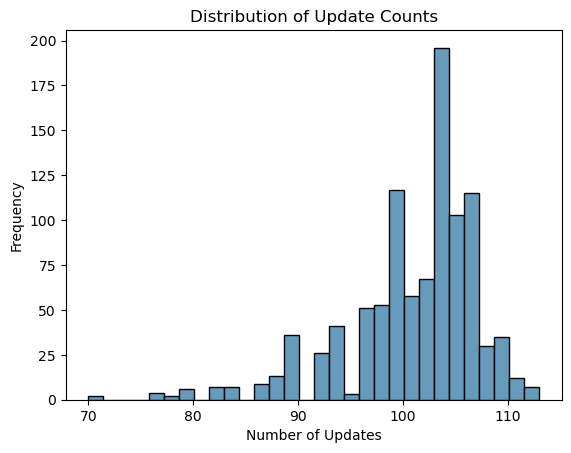

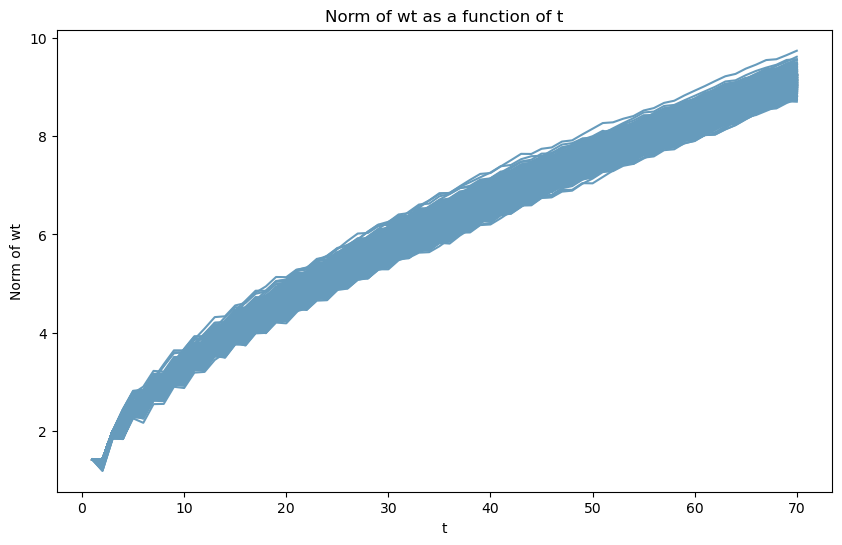

In [19]:
def PLA_rand(seed):
    rng = np.random.default_rng(seed)

    wt = list()
    w = np.zeros(d+1, dtype=float)
    u_count = 0
    non_mistake = 0

    while(non_mistake < 5 * N):
        idx = rng.integers(0, N)
        x = features_arr[idx]
        y = labels_arr[idx]

        sign = np.sign(np.dot(w, x))
        if sign == 0:
            sign = -1

        if y * sign <= 0:
            non_mistake = 0
            u_count += 1
            w = w + y * x
            wt.append(np.linalg.norm(w))

        non_mistake += 1

    return w, wt, u_count

ex_count = 0
w_list = list()
wt_list = list()
u_count_list = list()

while(ex_count < 1000):
    w, wt, u_count = PLA_rand(np.random.randint(0, 10000))
    w_list.append(w)
    wt_list.append(wt)
    u_count_list.append(u_count)

    print(f'Experiment {ex_count} finished with {u_count} updates')
    ex_count += 1

print(f'Average update count: {np.mean(u_count_list)}')
print(f'Median update count: {np.median(u_count_list)}')
print(f'max: {np.max(u_count_list)} | min: {np.min(u_count_list)}')

draw_histogram(u_count_list, 'pla_distribution')
draw_wt_plot(u_count_list, w, wt_list, 'pla_wt_plot')

Experiment 0 finished with 102 updates
Experiment 1 finished with 98 updates
Experiment 2 finished with 110 updates
Experiment 3 finished with 90 updates
Experiment 4 finished with 100 updates
Experiment 5 finished with 100 updates
Experiment 6 finished with 102 updates
Experiment 7 finished with 102 updates
Experiment 8 finished with 101 updates
Experiment 9 finished with 92 updates
Experiment 10 finished with 100 updates
Experiment 11 finished with 101 updates
Experiment 12 finished with 107 updates
Experiment 13 finished with 104 updates
Experiment 14 finished with 101 updates
Experiment 15 finished with 100 updates
Experiment 16 finished with 100 updates
Experiment 17 finished with 100 updates
Experiment 18 finished with 109 updates
Experiment 19 finished with 105 updates
Experiment 20 finished with 109 updates
Experiment 21 finished with 100 updates
Experiment 22 finished with 103 updates
Experiment 23 finished with 104 updates
Experiment 24 finished with 107 updates
Experiment 25

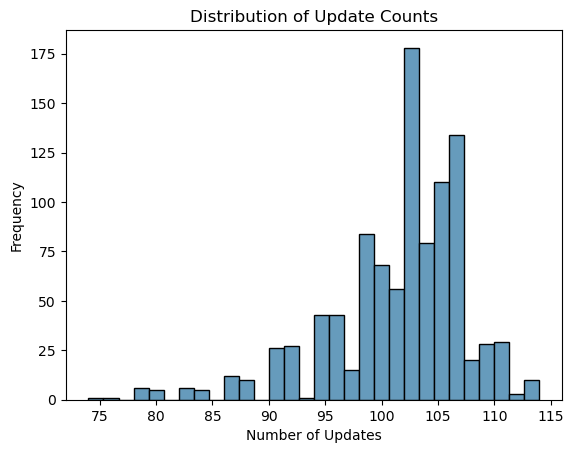

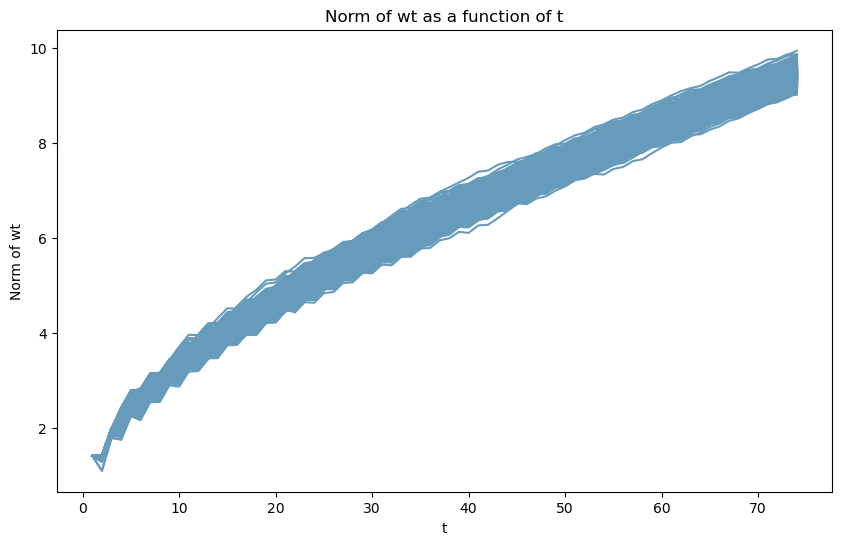

In [18]:
def m_PLA_rand(seed):
    rng = np.random.default_rng(seed)

    wt = list()
    w = np.zeros(d+1, dtype=float)
    u_count = 0
    non_mistake = 0

    while(non_mistake < 5 * N):
        idx = rng.integers(0, N)
        x = features_arr[idx]
        y = labels_arr[idx]

        while(1):
            sign = np.sign(np.dot(w, x))
            if sign == 0:
                sign = -1

            if y * sign < 0:
                non_mistake = 0
                u_count += 1
                w = w + y * x
                wt.append(np.linalg.norm(w))
            else:
                break

        non_mistake += 1

    return w, wt, u_count

ex_count = 0
w_list = list()
wt_list = list()
u_count_list = list()

while(ex_count < 1000):
    w, wt, u_count = m_PLA_rand(np.random.randint(0, 10000))
    w_list.append(w)
    wt_list.append(wt)
    u_count_list.append(u_count)

    print(f'Experiment {ex_count} finished with {u_count} updates')
    ex_count += 1

print(f'Average update count: {np.mean(u_count_list)}')
print(f'Median update count: {np.median(u_count_list)}')
print(f'max: {np.max(u_count_list)} | min: {np.min(u_count_list)}')

draw_histogram(u_count_list, 'm_pla_distribution')
draw_wt_plot(u_count_list, w, wt_list, 'm_pla_wt_plot')